# Dataset:
    
Telecom Churn Prediction Dataset
- Description: Contains customer information for a subscription-based service provider to predict customer churn (leaving the service).
- Columns: Includes customer details, services used, contract terms, and churn status.
- Purpose: Used for customer churn analysis, segmentation, and retention strategies.
- Applications: Churn prediction, customer satisfaction analysis, and targeted marketing.
- Analysis Tasks: EDA, data preprocessing, ML model building, evaluation, and model deployment.
- Relevance: A practical dataset for real-world data science and customer relationship management scenarios.

## Step 1: Importing Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Step 2: Loading the dataset

In [3]:
telecom_cust = pd.read_csv('Telco_Customer_Churn.csv')

## Step 3: Data Preprocessing & EDA

In [4]:
telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
telecom_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
telecom_cust.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
# Converting Total Charges to a numerical data type.

telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')

In [9]:
# Checking for null values
telecom_cust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
#Removing missing values 

telecom_cust.dropna(inplace = True)

In [11]:
#Remove customer IDs from the data set

df2 = telecom_cust.iloc[:,1:]

In [12]:
#Convertin the predictor variable in a binary numeric variable

df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [13]:
#Let's convert all the categorical variables into dummy variables

df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


<Axes: >

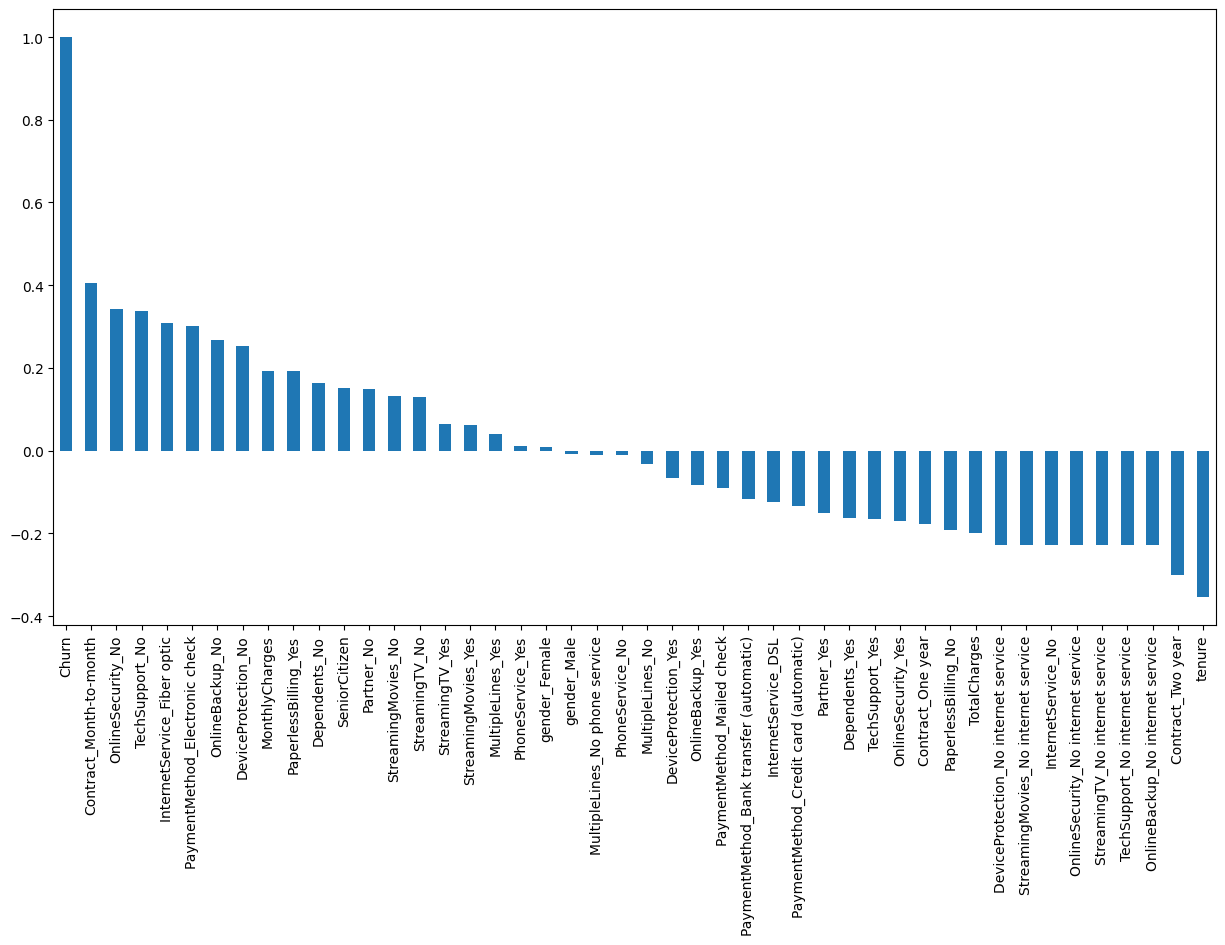

In [14]:
# Get Correlation of "Churn" with other variables

plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

### Intepretation

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. 
While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet 
connection seem to be negatively related to churn.

We will explore the patterns for the above correlations below before we delve into modelling and identifying
the important variables.

## Data Exploration

- To understand patterns & potentially form some hypothesis

### A) Demographic

- Gender, Age Range, Partner and Dependent status

------------------------------------------------------

1) Gender Distribution

In [16]:
telecom_cust

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


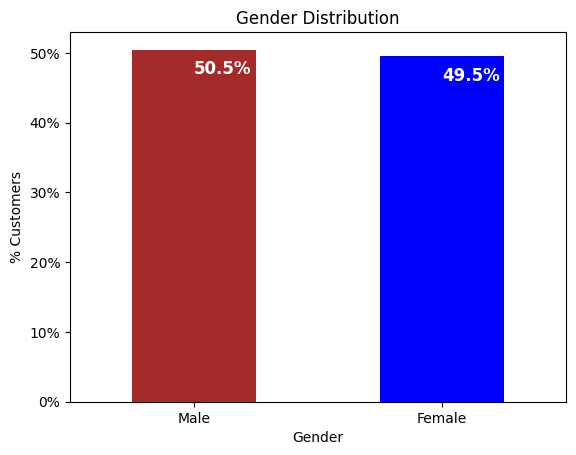

In [17]:
colors = ['brown', 'blue']
gender_counts = telecom_cust['gender'].value_counts()
ax = (gender_counts * 100.0 / len(telecom_cust)).plot(
    kind='bar',
    stacked=True,
    rot=0,
    color=colors
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_title('Gender Distribution')

# Iterate over the bar heights and add labels to the bars
total = gender_counts.sum()
for bar, count in zip(ax.patches, gender_counts):
    percentage = count / total * 100
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 3.5,
            f'{percentage:.1f}%',
            fontsize=12,
            color='white',
            weight='bold'
           )

plt.show()

# ----->
- Almost half are male & other half are female

#
2) Senior Citizen (%)

Text(0.5, 1.0, '% of Senior Citizens')

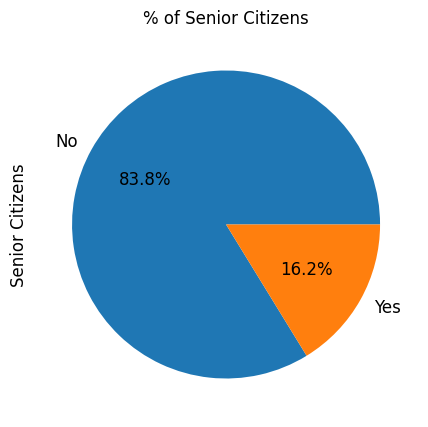

In [18]:
ax = (telecom_cust['SeniorCitizen'].value_counts()*100.0 /len(telecom_cust))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

# ------>

- Only 16% are senior citizen, that means most of the customer are younger people

# 
3) Partner and dependent status

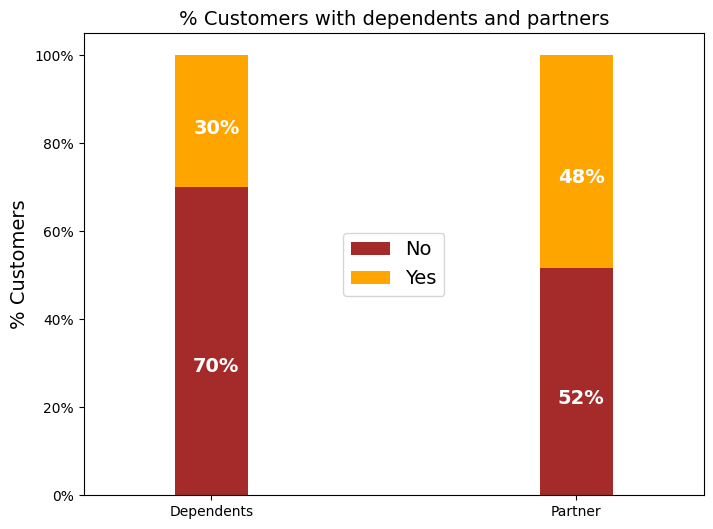

In [19]:
df2 = pd.melt(telecom_cust, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(telecom_cust)
colors = ['brown','orange']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

# ----->

About 50% of the customers have a partner, while only 30% of the total customers have dependents.

### B) Customer Account Information

- Tenure & contract

------------------------------------------

1) Tenure

Text(0.5, 1.0, 'No of Customers by their tenure')

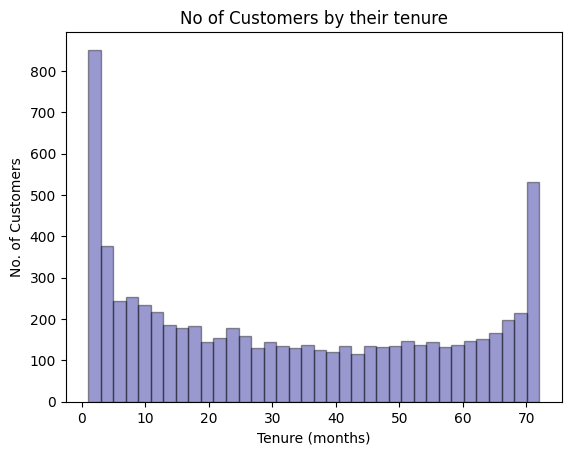

In [20]:
ax = sns.distplot(telecom_cust['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('No of Customers by their tenure')

#
2) Contracts

Text(0.5, 1.0, 'No. of Customers by Contract Type')

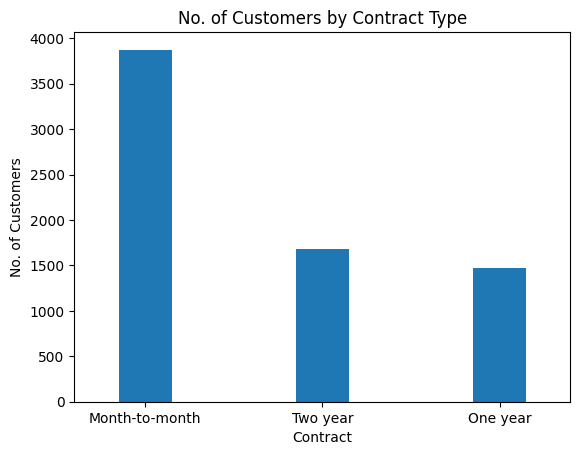

In [21]:
ax = telecom_cust['Contract'].value_counts().plot(kind = 'bar', rot = 0, width = 0.3)
ax.set_ylabel('No. of Customers')
ax.set_title('No. of Customers by Contract Type')

# ----->

Most of the customers are in the month to month contract while there are equal number of customers in the 1 year and 2 year contracts

Text(0.5, 1.0, 'Two Year Contract')

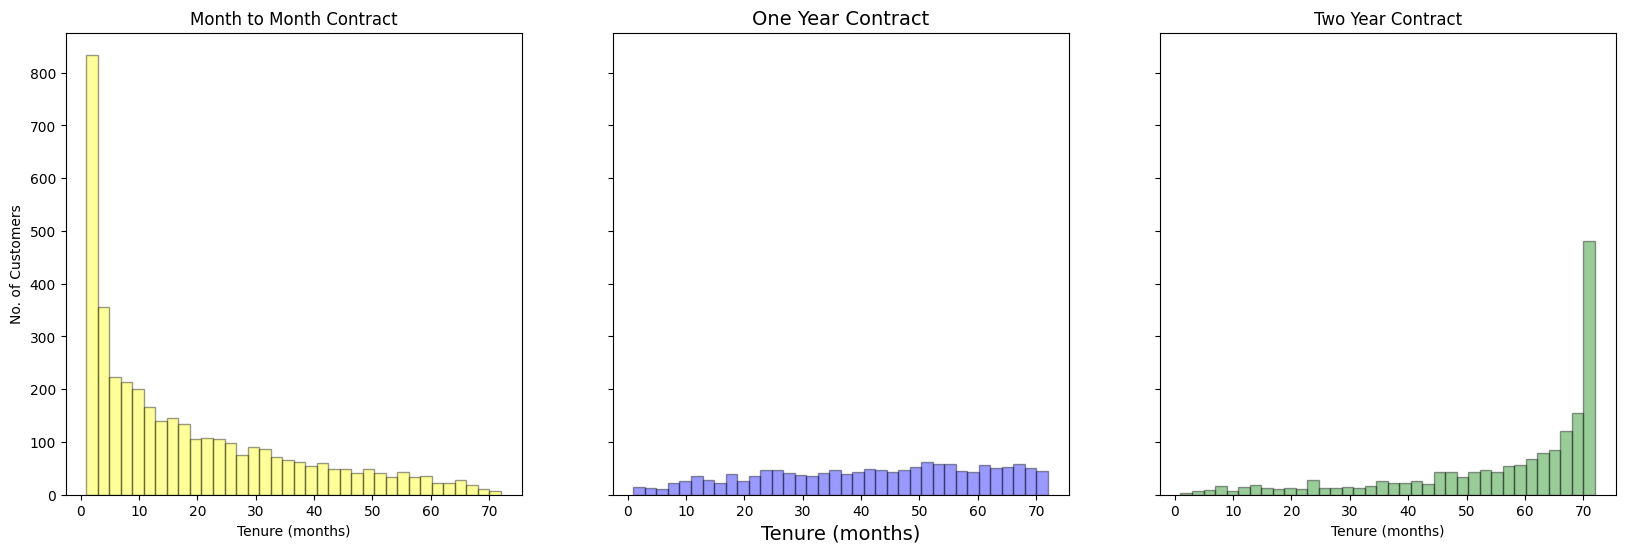

In [22]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'yellow',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'blue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'green',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

# ----->

Interestingly most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.

### C) Services Used by Customers



In [23]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

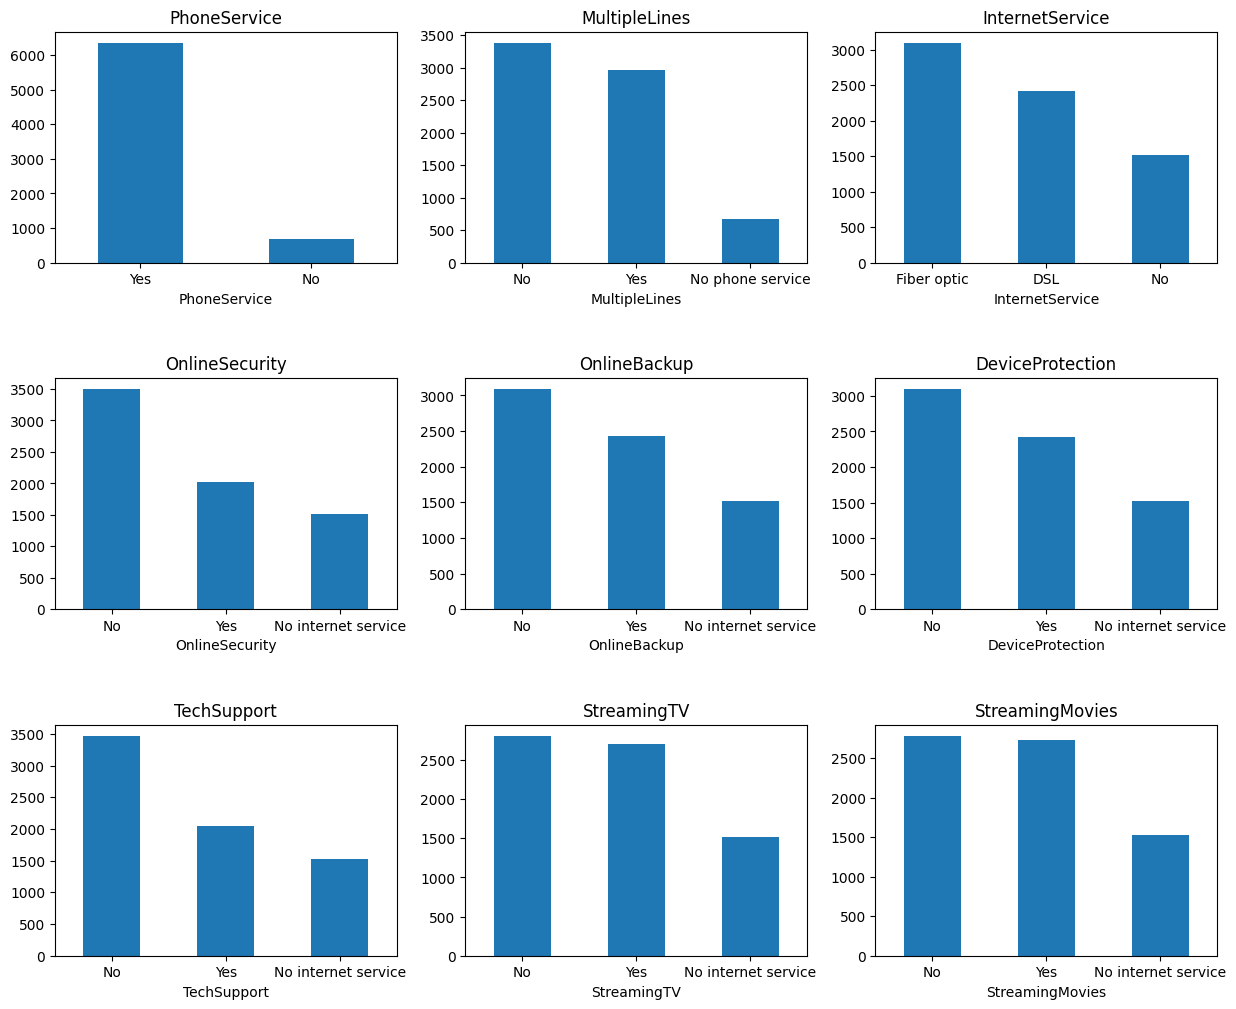

In [24]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

for i, item in enumerate(services):
    row, col = divmod(i, 3)  # Calculate row and column index

    ax = telecom_cust[item].value_counts().plot(kind='bar', ax=axes[row, col], rot=0)
    ax.set_title(item)

    for tick in ax.get_xticklabels():
        tick.set_rotation(0)  # Rotate x-axis labels for better readability

plt.show()

### D) Relation Between Monthly & Total Charges

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

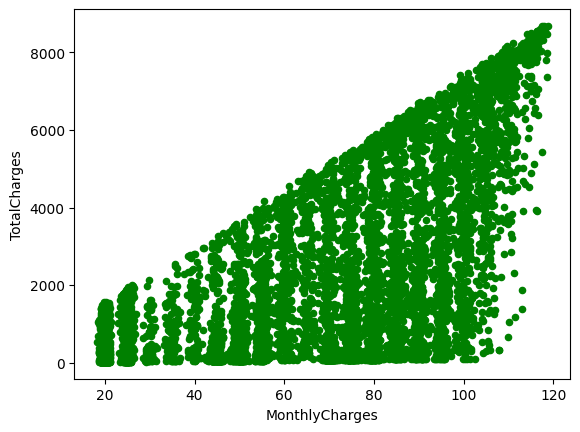

In [25]:
telecom_cust[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges', color = 'green')

# ----->

 Total charges increases as the monthly bill for a customer increases.

### E) Relationship between idependent variable (Churn) & other important variables

-------------------------------------------------------------------------------------------------

1) Churn rate with Customer

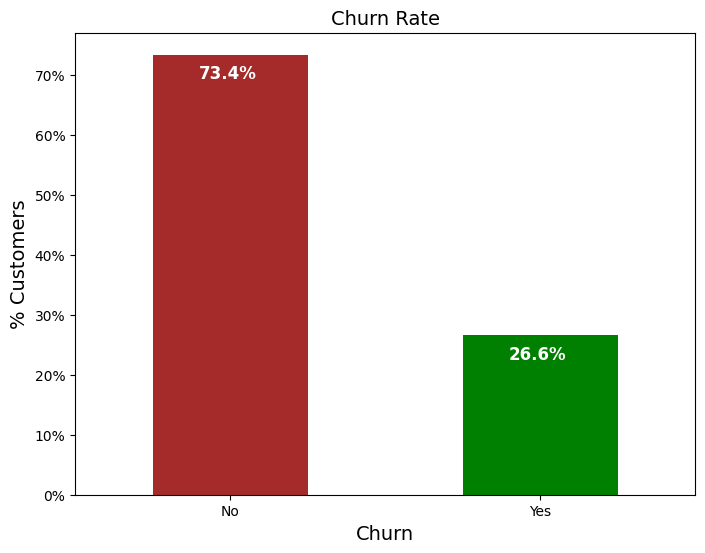

In [26]:
colors = ['brown', 'green']
ax = (telecom_cust['Churn'].value_counts() * 100.0 / len(telecom_cust)).plot(
    kind='bar',
    stacked=True,
    rot=0,
    color=colors,
    figsize=(8, 6)
)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', size=14)
ax.set_xlabel('Churn', size=14)
ax.set_title('Churn Rate', size=14)

# Create a list to collect the plt.patches data
totals = []

# Find the values and append to the list
for i in ax.patches:
    totals.append(i.get_width())

# Set individual bar labels using the above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x() + 0.15, i.get_height() - 4.0,
            str(round((i.get_height() / total), 1)) + '%',
            fontsize=12,
            color='white',
            weight='bold')

# 

2. Churn rate by ------> tenure, seniority, contract type, monthly charges and total charges
-
2.1. Churn vs Tenure

<Axes: xlabel='Churn', ylabel='tenure'>

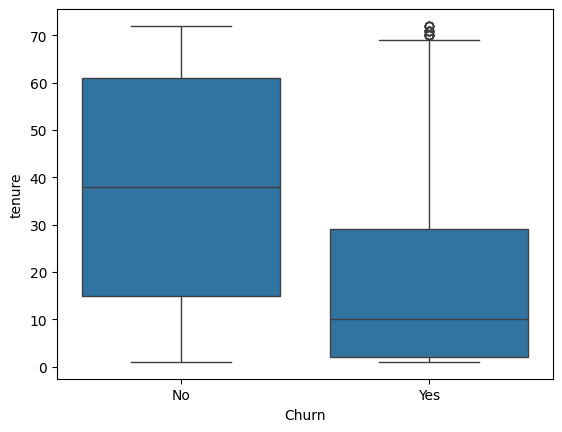

In [27]:
sns.boxplot(x = telecom_cust.Churn, y = telecom_cust.tenure)

# ----->

The customers who do not churn, they tend to stay for a longer tenure with the telecom company.

# 
- 2.2 Churn by Contract Type

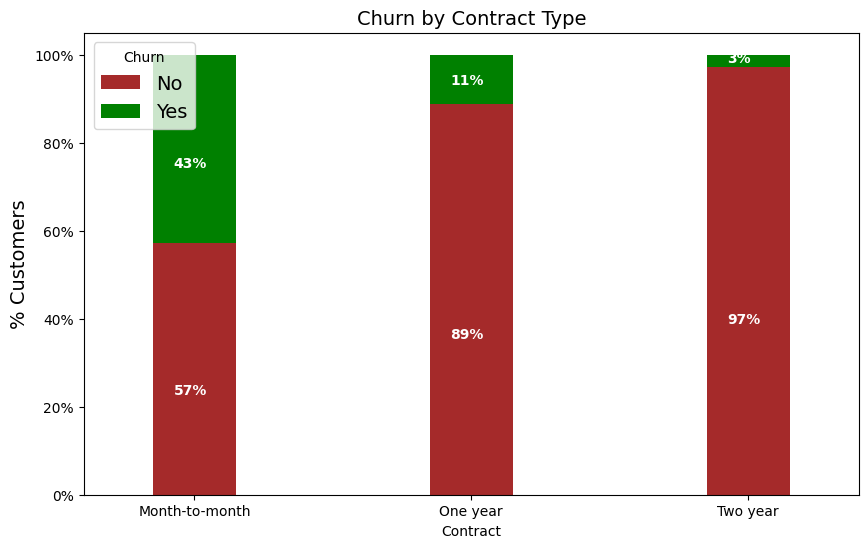

In [28]:
# colors = ['orange','brown']
contract_churn = telecom_cust.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 10)


# -----> 
The customers who have a month to month contract have a very high churn rate.

# 
- 2.3 Churn by Seniority

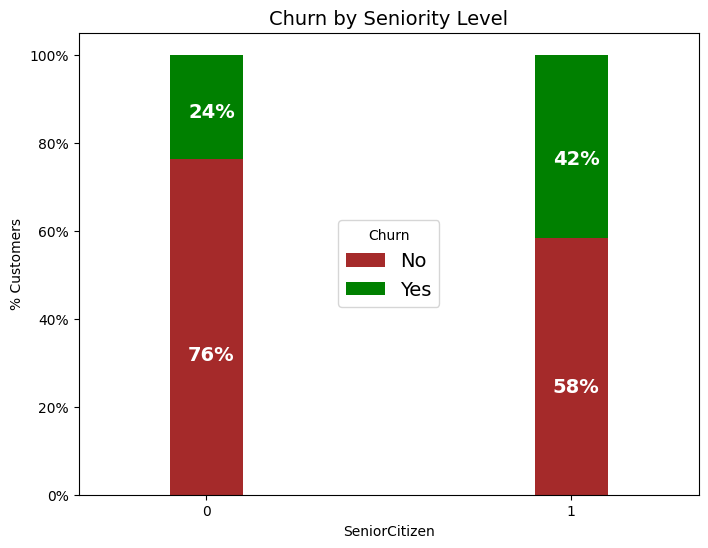

In [29]:
colors = ['brown','green']
seniority_churn = telecom_cust.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

# ------>

Senior Citizens have almost double the churn rate than younger population.

# 

- 2.4 Churn by Monthly Charges

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

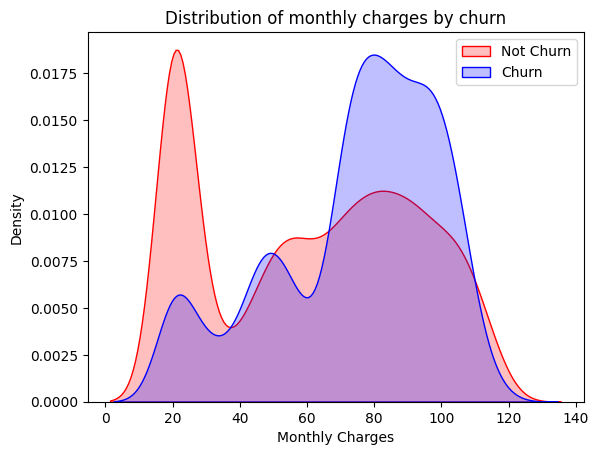

In [30]:
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

# ----->

Higher % of customers churn when the monthly charges are high.

# 
- 2.5 Churn by Total Charges

Text(0.5, 1.0, 'Distribution of total charges by churn')

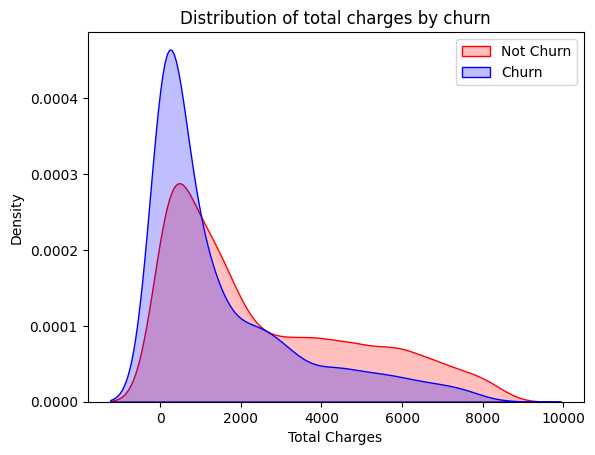

In [31]:
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

# ----->

There is higer churn when the total charges are lower.

## Step 4: Predictive modeling - ML Algorithms

--------------------------------------------------------------------------------------------------------
Developing 
- Logistic Regression, 
- Random Forest, 
- SVM, 
- ADA Boost and 
- XG Boost

and compare them

### 1. Logistic Regresson

In [32]:
# We will use the data frame where we had created dummy variables

y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1

from sklearn.preprocessing import MinMaxScaler

features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [33]:
# Create Train & Test Data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [34]:
# Running logistic regression model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [35]:
from sklearn import metrics
prediction_test = model.predict(X_test)

# Print the prediction accuracy

print (metrics.accuracy_score(y_test, prediction_test))

0.8075829383886256


Axes(0.125,0.11;0.775x0.77)


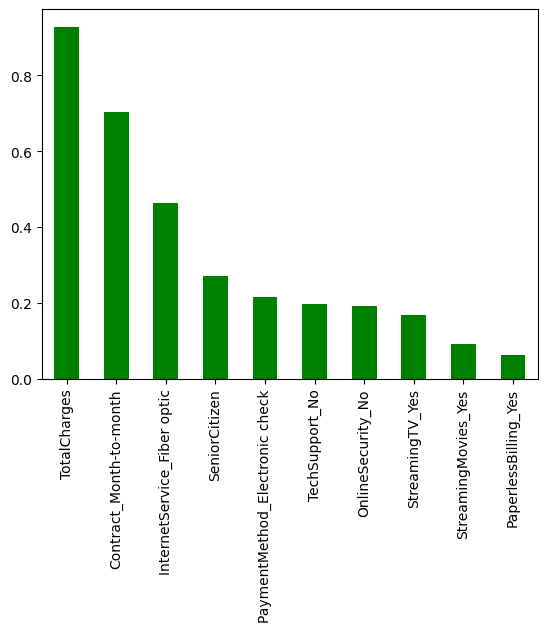

In [36]:
# To get the weights of all the variables

weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar', color = 'green'))

Axes(0.125,0.11;0.775x0.77)


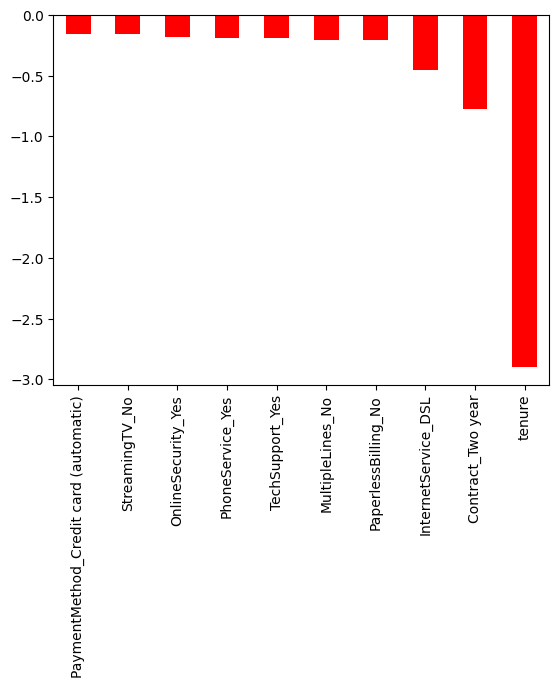

In [37]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar', color = 'red'))


#### Observations - LR

Some variable has positive & some negative relation with Predictive Variable (Churn)

- In EDA, having two month contracts reduces chance of Churn. That means it has negative relation with Churn.
- DSL internet also reduces the the probability of churn.
- total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates.

### 2. Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=50, max_leaf_nodes=30)
model_rf.fit(X_train, y_train)

# Make predictions

prediction_test = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.8095238095238095


<Axes: >

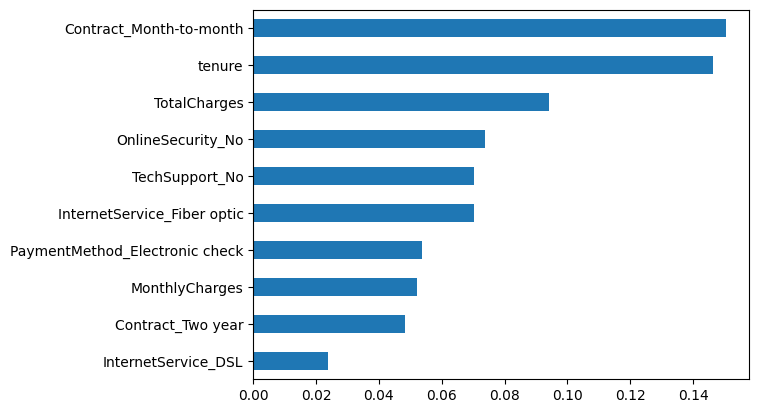

In [39]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

#### Observations - Random Forest

- Monthly contract, tenure and total charges are the most important predictor variables to predict churn.
- The results from random forest are very similar to that of the logistic regression and in line to what we had expected from our EDA

### 3. Support Vecor Machine (SVM)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [41]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.820184790334044

In [42]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds))

[[953  89]
 [164 201]]


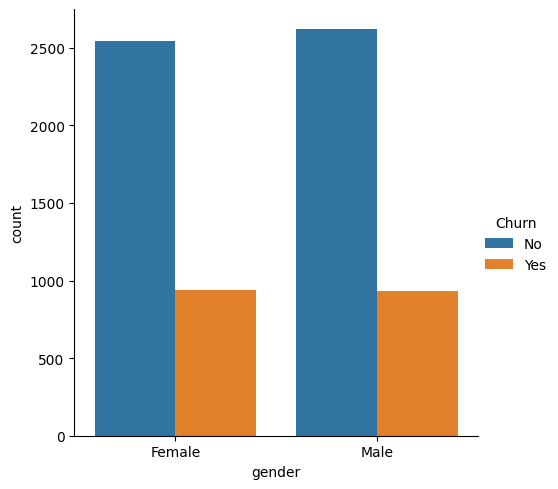

In [43]:
ax1 = sns.catplot(x="gender", kind="count", hue="Churn", data=telecom_cust,
                  estimator=lambda x: sum(x==0)*100.0/len(x))

#### Observation
- Wth SVM, the accuracy is increased to upto 82%.

### 4. ADA Boost

In [44]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8159203980099502

### 5. XG Boost

In [46]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.8 MB/s eta 0:00:00a 0:00:01


In [47]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8059701492537313

#### Observation
- Wth XG Boost, the accuracy is increased to upto 80%. 
-
XG Boost is a slow learning model and is based on the concept of Boosting.